In [1]:
# Import all the libaries will be required for entire project

import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8) # adjust the configuration of plots we will create 



In [2]:
# Reading the data in csv file

Table = pd.read_csv(r'C:\Users\varsh\Documents\movies.csv')

In [3]:
#looking for first 10 rows just for refrence

Table.head(10)  

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [4]:
# Percentage of missing data 

for col in Table.columns:
    percentage_missing = np.mean(Table[col].isnull())
    print(f'{col} - {percentage_missing}%')

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
Table = Table.fillna(0) #Replacing all the null values in table with 0

In [6]:
# Compraring all the % values null

for col in Table.columns:
    percentage_missing = np.mean(Table[col].isnull())
    print(f'{col} - {percentage_missing}%')

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [7]:
# Checking data types of columns

Table.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Change data type of columns buget and gross to integer

Table['budget'] = Table['budget'].astype('int64')
Table['gross'] = Table['gross'].astype('int64')


In [9]:
# Create correct year column

Table['year_correct'] = Table['released'].astype(str).str.split(',').str[1].str[1:5]

In [10]:
Table = Table.fillna(0)

In [11]:
# Sorting gross data in descending order

Table = Table.sort_values(by = ['gross'] , inplace = False , ascending = False)

In [12]:
# Command to see full data
# pd.set_option('display.max_rows', None)

pd.set_option('display.max_rows', 10) #Display first 10 rows of data

In [13]:
'''I am having two hypothesis:
    1. Correlation between Budget and Gross
    2. Correlation between Company and Gross
    
'''

'I am having two hypothesis:\n    1. Correlation between Budget and Gross\n    2. Correlation between Company and Gross\n    \n'

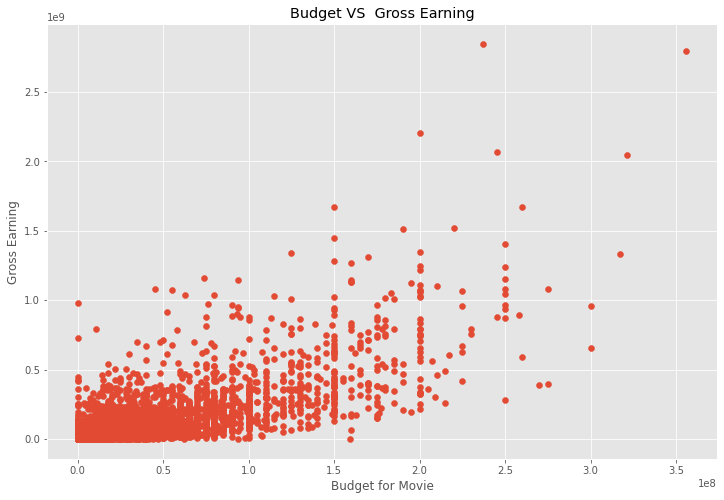

In [14]:
# Plotting scatter plot graph to understand the corelation between gross earing and buget

plt.scatter (x = Table['budget'] , y = Table['gross'])
plt.title('Budget VS  Gross Earning')
plt.xlabel('Budget for Movie')
plt.ylabel('Gross Earning')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

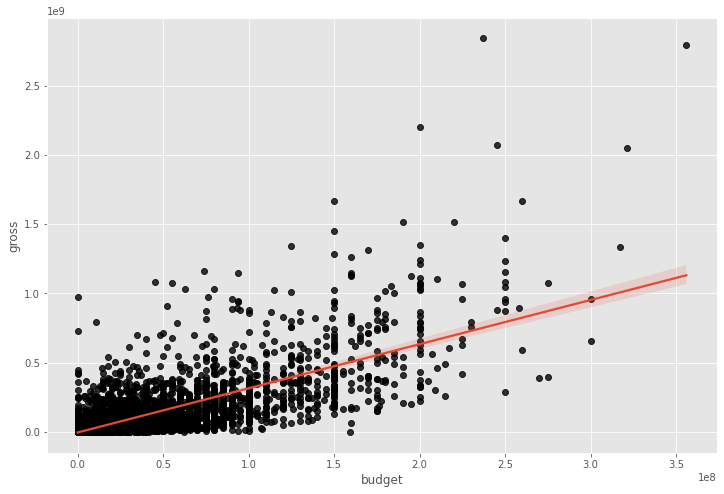

In [15]:
#  Creating reggression Plot of buget vs gross using seaborn

sb.regplot(x = Table['budget'] , y = Table['gross'] , data = Table , scatter_kws = {"color" : "black"})

In [16]:
#lets start looking at correlation default methods = "pearson"

In [17]:
Table.corr(method="pearson") # Diffent types of method are pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [18]:
# creating corelation matrix heatmap using seaborn

In [19]:
correlation_Matrix = Table.corr(method = 'pearson')

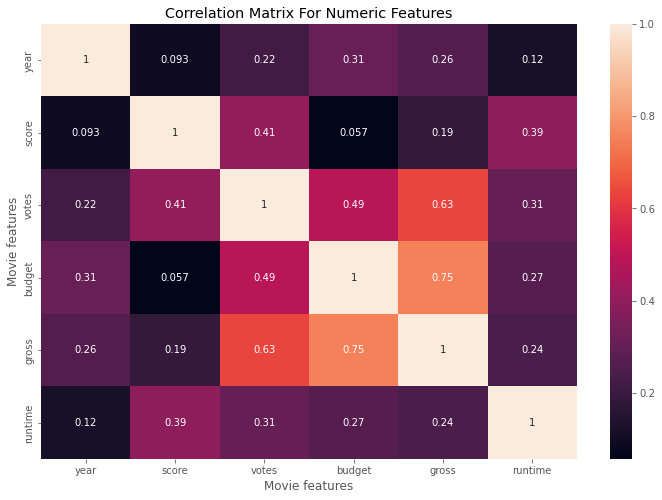

In [20]:
sb.heatmap(correlation_Matrix , annot =True)
plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [21]:
# Showing Data Table for comparision with category code table
Table.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [22]:
# Converting all data into numeric data 

Table_numerized = Table
for col_name in Table_numerized.columns:
    if Table_numerized[col_name].dtype == 'object':
        Table_numerized[col_name] = Table_numerized[col_name].astype('category')
        Table_numerized[col_name] = Table_numerized[col_name].cat.codes

In [23]:
#Category Code Table

Table_numerized.head() 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,30
7445,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,40
3045,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,18
6663,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,36
7244,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,39


In [24]:
# Creating and Storing Correlation Matrix by name of Numerized_correlation

Numerized_correlation = Table_numerized.corr()  

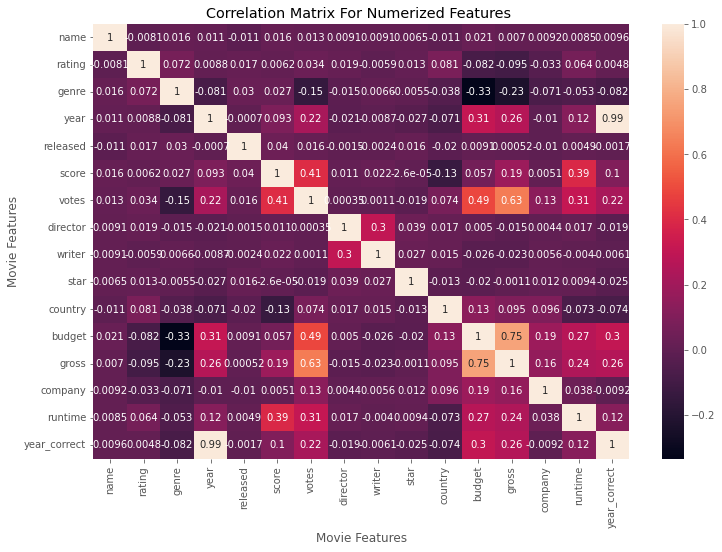

In [25]:
# Creating Heatmap of numeric Table

sb.heatmap(Numerized_correlation, annot = True)
plt.title("Correlation Matrix For Numerized Features ")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [26]:
# Creating Correlation pair by unstacking 

Correlation_mattrix = Table_numerized.corr()
Correlation_pairs = Correlation_mattrix.unstack()

In [27]:
Correlation_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
                                ...   
year_correct  budget          0.302266
              gross           0.256266
              company        -0.009185
              runtime         0.121206
              year_correct    1.000000
Length: 256, dtype: float64

In [28]:
# Sorting Correlation pairs to read more efficiently

Sorted_Pairs = Correlation_pairs.sort_values(ascending = True)

In [29]:
Sorted_Pairs

budget        genre          -0.334021
genre         budget         -0.334021
              gross          -0.234297
gross         genre          -0.234297
genre         votes          -0.145296
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64

In [30]:
# Filtering Values more then 0.5 in correlation

High_Correlation = Sorted_Pairs[0.5 <= Sorted_Pairs]
High_Correlation

votes         gross           0.632870
gross         votes           0.632870
budget        gross           0.750157
gross         budget          0.750157
year_correct  year            0.992136
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 22, dtype: float64

In [31]:
# From above we can conclude that Votes and Budget have the highest correlation with Gross